In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from Bayesian import BayesianLinearRegression

from sklearn.model_selection import train_test_split


sns.set_theme()
sns.set_context("notebook")
%load_ext autoreload
%autoreload 2

In [2]:
dtype_dict = {
    'Date': 'str',
    'FarmName_Pseudo': 'str',
    'SE_Number': 'str',
    'Age': 'Int64',
    'BreedName': 'str',
    'DailyYield': 'float',
    'PreviousDailyYield': 'float',
    'DailyYieldChange': 'float',
    'DaysInMilk': 'Int64',
    'YearSeason': 'str',
    'LactationNumber': 'Int64',
    'ExpectedYield': 'float',
    'NormalizedDailyYield': 'float',
    'NormalizedDailyYieldChange': 'float',
    'HeatStress': 'Int64',
    'Temp15Threshold': 'Int64',
    'HW': 'Int64',
    'cum_HW': 'Int64',
    'MeanTemperature': 'float',
    'MeanTHI_adj': 'float',
    'Residuals': 'float'
}

milk_data = pd.read_csv('../Data/MergedData/MilkApproachYieldDataTest.csv', dtype=dtype_dict)
milk_data['Date'] = pd.to_datetime(milk_data['Date'], format='%Y-%m-%d')
milk_data.head(-5)

,Date,FarmName_Pseudo,SE_Number,Age,BreedName,LactationNumber,DaysInMilk,YearSeason,DailyYield,PreviousDailyYield,...,ExpectedYield,NormalizedDailyYield,NormalizedDailyYieldChange,Residuals,HeatStress,Temp15Threshold,HW,cum_HW,MeanTemperature,MeanTHI_adj
0,2022-05-28,a624fb9a,SE-064c0cec-1189,3242,02 SLB,8,3,2022-2,15.22,0.0000,...,13.399562,1.135858,0.000000,1.820438,0,0,0,0,9.912500,50.478673
1,2022-05-29,a624fb9a,SE-064c0cec-1189,3243,02 SLB,8,4,2022-2,18.96,15.2200,...,17.370255,1.091521,0.107655,1.589745,0,0,0,0,10.066667,53.841648
2,2022-05-30,a624fb9a,SE-064c0cec-1189,3244,02 SLB,8,5,2022-2,22.64,17.0900,...,20.745402,1.091326,0.089176,1.894598,0,1,0,0,10.466667,52.935959
3,2022-05-31,a624fb9a,SE-064c0cec-1189,3245,02 SLB,8,6,2022-2,26.49,18.9400,...,23.612557,1.121861,0.079936,2.877443,0,0,0,0,11.183333,52.872112
4,2022-06-01,a624fb9a,SE-064c0cec-1189,3246,02 SLB,8,7,2022-3,33.61,20.8275,...,26.046402,1.290389,0.098152,7.563598,0,1,0,0,12.704167,56.056547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628671,2022-03-19,f454e660,SE-fcdf259d-0044-0,3709,41 Fjällko,9,274,2022-2,20.41,12.4860,...,15.953045,1.279380,0.020560,4.456955,0,0,0,0,3.866667,43.381437
628672,2022-03-20,f454e660,SE-fcdf259d-0044-0,3710,41 Fjällko,9,275,2022-2,12.17,12.8140,...,11.646730,1.044928,0.051173,0.523270,0,0,0,0,2.450000,40.920659
628673,2022-03-21,f454e660,SE-fcdf259d-0044-0,3711,41 Fjällko,9,276,2022-2,13.59,13.4100,...,12.456721,1.090977,0.051860,1.133279,0,0,0,0,3.170833,42.103862
628674,2022-03-22,f454e660,SE-fcdf259d-0044-0,3712,41 Fjällko,9,277,2022-2,13.20,14.0560,...,14.231801,0.927500,-0.062114,-1.031801,0,0,0,0,4.691667,43.334997


In [3]:
# Check data types
milk_data.dtypes

Date                          datetime64[ns]
FarmName_Pseudo                       object
SE_Number                             object
Age                                    Int64
BreedName                             object
LactationNumber                        Int64
DaysInMilk                             Int64
YearSeason                            object
DailyYield                           float64
PreviousDailyYield                   float64
DailyYieldChange                     float64
ExpectedYield                        float64
NormalizedDailyYield                 float64
NormalizedDailyYieldChange           float64
Residuals                            float64
HeatStress                             Int64
Temp15Threshold                        Int64
HW                                     Int64
cum_HW                                 Int64
MeanTemperature                      float64
MeanTHI_adj                          float64
dtype: object

In [4]:
# Check NaN values
milk_data.isnull().sum()

Date                          0
FarmName_Pseudo               0
SE_Number                     0
Age                           0
BreedName                     0
LactationNumber               0
DaysInMilk                    0
YearSeason                    0
DailyYield                    0
PreviousDailyYield            0
DailyYieldChange              0
ExpectedYield                 0
NormalizedDailyYield          0
NormalizedDailyYieldChange    0
Residuals                     0
HeatStress                    0
Temp15Threshold               0
HW                            0
cum_HW                        0
MeanTemperature               0
MeanTHI_adj                   0
dtype: int64

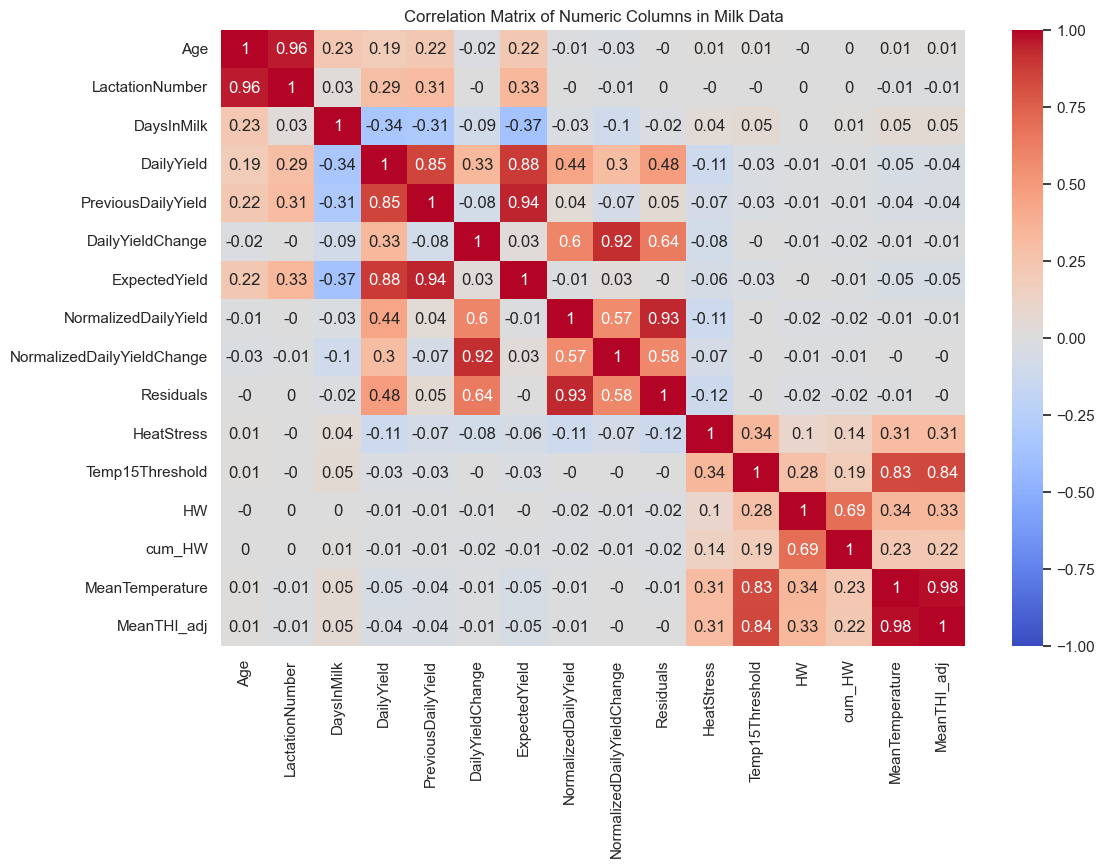

In [5]:
# Filter out only numeric columns
numeric_cols = milk_data.select_dtypes(include=['float64', 'int64']).columns
milk_data_numeric = milk_data[numeric_cols]

# Calculate the correlation matrix
corr_matrix = milk_data_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix.round(2), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Columns in Milk Data')
plt.show()

In [6]:
# Output the correlation matrix here in the notebook with two decimals
corr_matrix.round(2)

,Age,LactationNumber,DaysInMilk,DailyYield,PreviousDailyYield,DailyYieldChange,ExpectedYield,NormalizedDailyYield,NormalizedDailyYieldChange,Residuals,HeatStress,Temp15Threshold,HW,cum_HW,MeanTemperature,MeanTHI_adj
Age,1.00,0.96,0.23,0.19,0.22,-0.02,0.22,-0.01,-0.03,-0.00,0.01,0.01,-0.00,0.00,0.01,0.01
LactationNumber,0.96,1.00,0.03,0.29,0.31,-0.00,0.33,-0.00,-0.01,0.00,-0.00,-0.00,0.00,0.00,-0.01,-0.01
DaysInMilk,0.23,0.03,1.00,-0.34,-0.31,-0.09,-0.37,-0.03,-0.10,-0.02,0.04,0.05,0.00,0.01,0.05,0.05
DailyYield,0.19,0.29,-0.34,1.00,0.85,0.33,0.88,0.44,0.30,0.48,-0.11,-0.03,-0.01,-0.01,-0.05,-0.04
PreviousDailyYield,0.22,0.31,-0.31,0.85,1.00,-0.08,0.94,0.04,-0.07,0.05,-0.07,-0.03,-0.01,-0.01,-0.04,-0.04
DailyYieldChange,-0.02,-0.00,-0.09,0.33,-0.08,1.00,0.03,0.60,0.92,0.64,-0.08,-0.00,-0.01,-0.02,-0.01,-0.01
ExpectedYield,0.22,0.33,-0.37,0.88,0.94,0.03,1.00,-0.01,0.03,-0.00,-0.06,-0.03,-0.00,-0.01,-0.05,-0.05
NormalizedDailyYield,-0.01,-0.00,-0.03,0.44,0.04,0.60,-0.01,1.00,0.57,0.93,-0.11,-0.00,-0.02,-0.02,-0.01,-0.01
NormalizedDailyYieldChange,-0.03,-0.01,-0.10,0.30,-0.07,0.92,0.03,0.57,1.00,0.58,-0.07,-0.00,-0.01,-0.01,-0.00,-0.00
Residuals,-0.00,0.00,-0.02,0.48,0.05,0.64,-0.00,0.93,0.58,1.00,-0.12,-0.00,-0.02,-0.02,-0.01,-0.00


# Now we start modeling

**The aim is to find a quantitative factor for each farm which tells us approximately how much does heatstress affect the milk yield on that specific farm.**

## Farm a624fb9a

### Block 1: Model Training and Relative Change Calculation

In this block, we train a Bayesian linear regression model for each combination of features to determine the impact of heat stress on milk production. We calculate the relative change in normalized daily yield for each farm under heat stress and no heat stress conditions.

**Process:**
1. **Data Preparation**: Filter the dataset for the specific farm and split it based on the `HeatStress` condition into training and validation sets.
2. **Feature Scaling**: Scale the continuous features (MeanTemperature, MeanTHI_adj) in the training sets using `StandardScaler`.
3. **Model Training**: For each feature combination:
   - Define priors based on the mean and variance of the normalized daily yield and selected features from the training data.
   - Initialize and fit a Bayesian linear regression model on the training data.
   - Calculate the relative change in normalized daily yield for the offset (baseline) in percentage terms using the training data.
4. **Output**: Print the prior and posterior means and standard deviations for each feature combination and the relative change percentage.

This block helps identify how different features affect milk production under varying heat stress conditions using training data.

In [7]:
# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=['FarmName_Pseudo', 'FarmHeatStressMilkProduction'])

# Set subject type to 'farm'
subject_type = 'farm'

# Specify the farm ID for analysis
farm_id = 'a624fb9a'

# Filter data for the specific farm
farm_data = milk_data[milk_data['FarmName_Pseudo'] == farm_id]

# Check if NormalizedDailyYield is centered around 1
normalized_mean = farm_data['NormalizedDailyYield'].mean()
normalized_variance = farm_data['NormalizedDailyYield'].var()
print("Mean of NormalizedDailyYield:", normalized_mean)
print("Standard Deviation of NormalizedDailyYield:", farm_data['NormalizedDailyYield'].std())
print("Variance of NormalizedDailyYield:", normalized_variance)

# Define the target variable
target = 'NormalizedDailyYield'

# Split the data into train and validation sets
train_data, val_data = train_test_split(farm_data, test_size=0.3, random_state=42)

# Define the single feature
features = ['HeatStress']

# Calculate the correlation between HeatStress and NormalizedDailyYield
heatstress_correlation = train_data['HeatStress'].corr(train_data[target])
print("Correlation between HeatStress and NormalizedDailyYield:", heatstress_correlation)

# Function to fit and get the posterior mean for HeatStress
def fit_and_get_heatstress_posterior(farm_id, train_data, features, heatstress_correlation):
    print(f"\nSelected features: {features}")

    # Calculate prior means for the features
    prior_mean_values = [heatstress_correlation]  # Use correlation as prior mean for HeatStress
    prior_std_values = [train_data[feature].std() for feature in features]
    
    # Define priors
    prior_mean = np.array([normalized_mean] + prior_mean_values).reshape(-1, 1)
    prior_std = np.array([np.sqrt(normalized_variance)] + prior_std_values).reshape(-1, 1)
    prior_cov = np.eye(len(features) + 1) * 0.01  # Smaller value for stronger prior confidence
    beta = 1 / normalized_variance

    # Print prior means and standard deviations
    print(f"\nPrior Mean and Standard Deviation for each feature:\n")
    for feature, mean, std in zip(['Off-set'] + features, prior_mean.flatten(), prior_std.flatten()):
        print(f"{feature}: mean = {mean}, std_dev = {std}")

    # Initialize and fit the model
    model = BayesianLinearRegression(
        dataframe=train_data,
        subject_name=farm_id,
        selected_features=features,
        target=target,
        subject_type=subject_type,
        prior_mean=prior_mean,
        prior_cov=prior_cov,
        beta=beta
    )
    result = model.fit_model()

    # Print posterior mean and standard deviation for each feature
    print(f"\nPosterior Mean and Standard Deviation for each feature:\n")
    for feature, stats in result.items():
        print(f"{feature}: mean = {stats['mu']}, std_dev = {stats['sigma']}")

    # Extract the posterior mean for HeatStress
    heatstress_posterior_mean = result['HeatStress']['mu']

    return heatstress_posterior_mean

# Train the model with the HeatStress feature on the training set and print results
heatstress_posterior_mean = fit_and_get_heatstress_posterior(farm_id, train_data, features, heatstress_correlation)

# Create a new DataFrame for the current farm's result
new_result = pd.DataFrame([{
    'FarmName_Pseudo': farm_id,
    'FarmHeatStressMilkProduction': heatstress_posterior_mean
}])

# Check if results_df is empty before concatenation
if results_df.empty:
    results_df = new_result
else:
    results_df = pd.concat([results_df, new_result], ignore_index=True)

results_df

Mean of NormalizedDailyYield: 1.0006797132573264
Standard Deviation of NormalizedDailyYield: 0.1789583483762312
Variance of NormalizedDailyYield: 0.03202609045354853
Correlation between HeatStress and NormalizedDailyYield: -0.08597967701449356

Selected features: ['HeatStress']

Prior Mean and Standard Deviation for each feature:

Off-set: mean = 1.0006797132573264, std_dev = 0.1789583483762312
HeatStress: mean = -0.08597967701449356, std_dev = 0.3441550563207092

Posterior Mean and Standard Deviation for each feature:

Off-set: mean = 1.0079032166211552, std_dev = 0.0008571774988587925
HeatStress: mean = -0.044815492882315164, std_dev = 0.0023133696215770303


,FarmName_Pseudo,FarmHeatStressMilkProduction
0,a624fb9a,-0.044815


# Now we do the same for the rest of the farms

## Farm 5c06d92d

In [8]:
# Set subject type to 'farm'
subject_type = 'farm'

# Specify the farm ID for analysis
farm_id = '5c06d92d'

# Filter data for the specific farm
farm_data = milk_data[milk_data['FarmName_Pseudo'] == farm_id]

# Check if NormalizedDailyYield is centered around 1
normalized_mean = farm_data['NormalizedDailyYield'].mean()
normalized_variance = farm_data['NormalizedDailyYield'].var()
print("Mean of NormalizedDailyYield:", normalized_mean)
print("Standard Deviation of NormalizedDailyYield:", farm_data['NormalizedDailyYield'].std())
print("Variance of NormalizedDailyYield:", normalized_variance)

# Define the target variable
target = 'NormalizedDailyYield'

# Split the data into train and validation sets
train_data, val_data = train_test_split(farm_data, test_size=0.3, random_state=42)

# Define the single feature
features = ['HeatStress']

# Calculate the correlation between HeatStress and NormalizedDailyYield
heatstress_correlation = train_data['HeatStress'].corr(train_data[target])
print("Correlation between HeatStress and NormalizedDailyYield:", heatstress_correlation)

# Function to fit and get the posterior mean for HeatStress
def fit_and_get_heatstress_posterior(farm_id, train_data, features, heatstress_correlation):
    print(f"\nSelected features: {features}")

    # Calculate prior means for the features
    prior_mean_values = [heatstress_correlation]  # Use correlation as prior mean for HeatStress
    prior_std_values = [train_data[feature].std() for feature in features]
    
    # Define priors
    prior_mean = np.array([normalized_mean] + prior_mean_values).reshape(-1, 1)
    prior_std = np.array([np.sqrt(normalized_variance)] + prior_std_values).reshape(-1, 1)
    prior_cov = np.eye(len(features) + 1) * 0.01  # Smaller value for stronger prior confidence
    beta = 1 / normalized_variance

    # Print prior means and standard deviations
    print(f"\nPrior Mean and Standard Deviation for each feature:\n")
    for feature, mean, std in zip(['Off-set'] + features, prior_mean.flatten(), prior_std.flatten()):
        print(f"{feature}: mean = {mean}, std_dev = {std}")

    # Initialize and fit the model
    model = BayesianLinearRegression(
        dataframe=train_data,
        subject_name=farm_id,
        selected_features=features,
        target=target,
        subject_type=subject_type,
        prior_mean=prior_mean,
        prior_cov=prior_cov,
        beta=beta
    )
    result = model.fit_model()

    # Print posterior mean and standard deviation for each feature
    print(f"\nPosterior Mean and Standard Deviation for each feature:\n")
    for feature, stats in result.items():
        print(f"{feature}: mean = {stats['mu']}, std_dev = {stats['sigma']}")

    # Extract the posterior mean for HeatStress
    heatstress_posterior_mean = result['HeatStress']['mu']

    return heatstress_posterior_mean

# Train the model with the HeatStress feature on the training set and print results
heatstress_posterior_mean = fit_and_get_heatstress_posterior(farm_id, train_data, features, heatstress_correlation)

# Create a new DataFrame for the current farm's result
new_result = pd.DataFrame([{
    'FarmName_Pseudo': farm_id,
    'FarmHeatStressMilkProduction': heatstress_posterior_mean
}])

# Check if results_df is empty before concatenation
if results_df.empty:
    results_df = new_result
else:
    results_df = pd.concat([results_df, new_result], ignore_index=True)

results_df

Mean of NormalizedDailyYield: 1.0011346282777653
Standard Deviation of NormalizedDailyYield: 0.13258205687617292
Variance of NormalizedDailyYield: 0.01757800180551675
Correlation between HeatStress and NormalizedDailyYield: -0.18194898311285415

Selected features: ['HeatStress']

Prior Mean and Standard Deviation for each feature:

Off-set: mean = 1.0011346282777653, std_dev = 0.13258205687617292
HeatStress: mean = -0.18194898311285415, std_dev = 0.16343802466381052

Posterior Mean and Standard Deviation for each feature:

Off-set: mean = 1.0053106871360773, std_dev = 0.00031374081138062427
HeatStress: mean = -0.14714828561904247, std_dev = 0.0018930587143216485


,FarmName_Pseudo,FarmHeatStressMilkProduction
0,a624fb9a,-0.044815
1,5c06d92d,-0.147148


## Farm 752efd72

In [9]:
# Set subject type to 'farm'
subject_type = 'farm'

# Specify the farm ID for analysis
farm_id = '752efd72'

# Filter data for the specific farm
farm_data = milk_data[milk_data['FarmName_Pseudo'] == farm_id]

# Check if NormalizedDailyYield is centered around 1
normalized_mean = farm_data['NormalizedDailyYield'].mean()
normalized_variance = farm_data['NormalizedDailyYield'].var()
print("Mean of NormalizedDailyYield:", normalized_mean)
print("Standard Deviation of NormalizedDailyYield:", farm_data['NormalizedDailyYield'].std())
print("Variance of NormalizedDailyYield:", normalized_variance)

# Define the target variable
target = 'NormalizedDailyYield'

# Split the data into train and validation sets
train_data, val_data = train_test_split(farm_data, test_size=0.3, random_state=42)

# Define the single feature
features = ['HeatStress']

# Calculate the correlation between HeatStress and NormalizedDailyYield
heatstress_correlation = train_data['HeatStress'].corr(train_data[target])
print("Correlation between HeatStress and NormalizedDailyYield:", heatstress_correlation)

# Function to fit and get the posterior mean for HeatStress
def fit_and_get_heatstress_posterior(farm_id, train_data, features, heatstress_correlation):
    print(f"\nSelected features: {features}")

    # Calculate prior means for the features
    prior_mean_values = [heatstress_correlation]  # Use correlation as prior mean for HeatStress
    prior_std_values = [train_data[feature].std() for feature in features]
    
    # Define priors
    prior_mean = np.array([normalized_mean] + prior_mean_values).reshape(-1, 1)
    prior_std = np.array([np.sqrt(normalized_variance)] + prior_std_values).reshape(-1, 1)
    prior_cov = np.eye(len(features) + 1) * 0.01  # Smaller value for stronger prior confidence
    beta = 1 / normalized_variance

    # Print prior means and standard deviations
    print(f"\nPrior Mean and Standard Deviation for each feature:\n")
    for feature, mean, std in zip(['Off-set'] + features, prior_mean.flatten(), prior_std.flatten()):
        print(f"{feature}: mean = {mean}, std_dev = {std}")

    # Initialize and fit the model
    model = BayesianLinearRegression(
        dataframe=train_data,
        subject_name=farm_id,
        selected_features=features,
        target=target,
        subject_type=subject_type,
        prior_mean=prior_mean,
        prior_cov=prior_cov,
        beta=beta
    )
    result = model.fit_model()

    # Print posterior mean and standard deviation for each feature
    print(f"\nPosterior Mean and Standard Deviation for each feature:\n")
    for feature, stats in result.items():
        print(f"{feature}: mean = {stats['mu']}, std_dev = {stats['sigma']}")

    # Extract the posterior mean for HeatStress
    heatstress_posterior_mean = result['HeatStress']['mu']

    return heatstress_posterior_mean

# Train the model with the HeatStress feature on the training set and print results
heatstress_posterior_mean = fit_and_get_heatstress_posterior(farm_id, train_data, features, heatstress_correlation)

# Create a new DataFrame for the current farm's result
new_result = pd.DataFrame([{
    'FarmName_Pseudo': farm_id,
    'FarmHeatStressMilkProduction': heatstress_posterior_mean
}])

# Check if results_df is empty before concatenation
if results_df.empty:
    results_df = new_result
else:
    results_df = pd.concat([results_df, new_result], ignore_index=True)

results_df

Mean of NormalizedDailyYield: 1.0017686247420325
Standard Deviation of NormalizedDailyYield: 0.10997914842092445
Variance of NormalizedDailyYield: 0.012095413087391727
Correlation between HeatStress and NormalizedDailyYield: -0.13814670264444082

Selected features: ['HeatStress']

Prior Mean and Standard Deviation for each feature:

Off-set: mean = 1.0017686247420325, std_dev = 0.10997914842092445
HeatStress: mean = -0.13814670264444082, std_dev = 0.25037880879734525

Posterior Mean and Standard Deviation for each feature:

Off-set: mean = 1.005972180157393, std_dev = 0.00030606865744069726
HeatStress: mean = -0.06156258869688726, std_dev = 0.001180628106922045


,FarmName_Pseudo,FarmHeatStressMilkProduction
0,a624fb9a,-0.044815
1,5c06d92d,-0.147148
2,752efd72,-0.061563


## Farm f454e660

In [10]:
# Set subject type to 'farm'
subject_type = 'farm'

# Specify the farm ID for analysis
farm_id = 'f454e660'

# Filter data for the specific farm
farm_data = milk_data[milk_data['FarmName_Pseudo'] == farm_id]

# Check if NormalizedDailyYield is centered around 1
normalized_mean = farm_data['NormalizedDailyYield'].mean()
normalized_variance = farm_data['NormalizedDailyYield'].var()
print("Mean of NormalizedDailyYield:", normalized_mean)
print("Standard Deviation of NormalizedDailyYield:", farm_data['NormalizedDailyYield'].std())
print("Variance of NormalizedDailyYield:", normalized_variance)

# Define the target variable
target = 'NormalizedDailyYield'

# Split the data into train and validation sets
train_data, val_data = train_test_split(farm_data, test_size=0.3, random_state=42)

# Define the single feature
features = ['HeatStress']

# Calculate the correlation between HeatStress and NormalizedDailyYield
heatstress_correlation = train_data['HeatStress'].corr(train_data[target])
print("Correlation between HeatStress and NormalizedDailyYield:", heatstress_correlation)

# Function to fit and get the posterior mean for HeatStress
def fit_and_get_heatstress_posterior(farm_id, train_data, features, heatstress_correlation):
    print(f"\nSelected features: {features}")

    # Calculate prior means for the features
    prior_mean_values = [heatstress_correlation]  # Use correlation as prior mean for HeatStress
    prior_std_values = [train_data[feature].std() for feature in features]
    
    # Define priors
    prior_mean = np.array([normalized_mean] + prior_mean_values).reshape(-1, 1)
    prior_std = np.array([np.sqrt(normalized_variance)] + prior_std_values).reshape(-1, 1)
    prior_cov = np.eye(len(features) + 1) * 0.01  # Smaller value for stronger prior confidence
    beta = 1 / normalized_variance

    # Print prior means and standard deviations
    print(f"\nPrior Mean and Standard Deviation for each feature:\n")
    for feature, mean, std in zip(['Off-set'] + features, prior_mean.flatten(), prior_std.flatten()):
        print(f"{feature}: mean = {mean}, std_dev = {std}")

    # Initialize and fit the model
    model = BayesianLinearRegression(
        dataframe=train_data,
        subject_name=farm_id,
        selected_features=features,
        target=target,
        subject_type=subject_type,
        prior_mean=prior_mean,
        prior_cov=prior_cov,
        beta=beta
    )
    result = model.fit_model()

    # Print posterior mean and standard deviation for each feature
    print(f"\nPosterior Mean and Standard Deviation for each feature:\n")
    for feature, stats in result.items():
        print(f"{feature}: mean = {stats['mu']}, std_dev = {stats['sigma']}")

    # Extract the posterior mean for HeatStress
    heatstress_posterior_mean = result['HeatStress']['mu']

    return heatstress_posterior_mean

# Train the model with the HeatStress feature on the training set and print results
heatstress_posterior_mean = fit_and_get_heatstress_posterior(farm_id, train_data, features, heatstress_correlation)

# Create a new DataFrame for the current farm's result
new_result = pd.DataFrame([{
    'FarmName_Pseudo': farm_id,
    'FarmHeatStressMilkProduction': heatstress_posterior_mean
}])

# Check if results_df is empty before concatenation
if results_df.empty:
    results_df = new_result
else:
    results_df = pd.concat([results_df, new_result], ignore_index=True)

results_df

Mean of NormalizedDailyYield: 1.0009298243439537
Standard Deviation of NormalizedDailyYield: 0.23509511818997542
Variance of NormalizedDailyYield: 0.05526971459675851
Correlation between HeatStress and NormalizedDailyYield: -0.08045835872179058

Selected features: ['HeatStress']

Prior Mean and Standard Deviation for each feature:

Off-set: mean = 1.0009298243439537, std_dev = 0.23509511818997542
HeatStress: mean = -0.08045835872179058, std_dev = 0.3608625265121971

Posterior Mean and Standard Deviation for each feature:

Off-set: mean = 1.0083123719370684, std_dev = 0.0010179305785198906
HeatStress: mean = -0.05294205001159679, std_dev = 0.002594647107389129


,FarmName_Pseudo,FarmHeatStressMilkProduction
0,a624fb9a,-0.044815
1,5c06d92d,-0.147148
2,752efd72,-0.061563
3,f454e660,-0.052942


In [11]:
# Merge the results_df with milk_data on 'FarmName_Pseudo'
milk_data = milk_data.merge(results_df, on='FarmName_Pseudo', how='left')

# Set 'FarmHeatStressMilkProduction' to NaN where 'HeatStress' is 0
milk_data.loc[milk_data['HeatStress'] == 0, 'FarmHeatStressMilkProduction'] = np.nan
milk_data.head(-5)

,Date,FarmName_Pseudo,SE_Number,Age,BreedName,LactationNumber,DaysInMilk,YearSeason,DailyYield,PreviousDailyYield,...,NormalizedDailyYield,NormalizedDailyYieldChange,Residuals,HeatStress,Temp15Threshold,HW,cum_HW,MeanTemperature,MeanTHI_adj,FarmHeatStressMilkProduction
0,2022-05-28,a624fb9a,SE-064c0cec-1189,3242,02 SLB,8,3,2022-2,15.22,0.0000,...,1.135858,0.000000,1.820438,0,0,0,0,9.912500,50.478673,NaN
1,2022-05-29,a624fb9a,SE-064c0cec-1189,3243,02 SLB,8,4,2022-2,18.96,15.2200,...,1.091521,0.107655,1.589745,0,0,0,0,10.066667,53.841648,NaN
2,2022-05-30,a624fb9a,SE-064c0cec-1189,3244,02 SLB,8,5,2022-2,22.64,17.0900,...,1.091326,0.089176,1.894598,0,1,0,0,10.466667,52.935959,NaN
3,2022-05-31,a624fb9a,SE-064c0cec-1189,3245,02 SLB,8,6,2022-2,26.49,18.9400,...,1.121861,0.079936,2.877443,0,0,0,0,11.183333,52.872112,NaN
4,2022-06-01,a624fb9a,SE-064c0cec-1189,3246,02 SLB,8,7,2022-3,33.61,20.8275,...,1.290389,0.098152,7.563598,0,1,0,0,12.704167,56.056547,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628671,2022-03-19,f454e660,SE-fcdf259d-0044-0,3709,41 Fjällko,9,274,2022-2,20.41,12.4860,...,1.279380,0.020560,4.456955,0,0,0,0,3.866667,43.381437,NaN
628672,2022-03-20,f454e660,SE-fcdf259d-0044-0,3710,41 Fjällko,9,275,2022-2,12.17,12.8140,...,1.044928,0.051173,0.523270,0,0,0,0,2.450000,40.920659,NaN
628673,2022-03-21,f454e660,SE-fcdf259d-0044-0,3711,41 Fjällko,9,276,2022-2,13.59,13.4100,...,1.090977,0.051860,1.133279,0,0,0,0,3.170833,42.103862,NaN
628674,2022-03-22,f454e660,SE-fcdf259d-0044-0,3712,41 Fjällko,9,277,2022-2,13.20,14.0560,...,0.927500,-0.062114,-1.031801,0,0,0,0,4.691667,43.334997,NaN


In [12]:
# Save the new data to a new CSV file called 'BLRMilkFarmYieldData.csv' in same folder
milk_data.to_csv('../Data/MergedData/BLRMilkFarmYieldData.csv', index=False)

### Variables Explanation for `BLRMilkFarmYieldData.csv`

1. **Date**:
   - Description: The date when the milk yield was recorded.
   - Datatype: `datetime`
   - Format: `YYYY-MM-DD`
   - Example: `2022-01-01`

2. **FarmName_Pseudo**:
   - Description: A pseudo-identifier for the farm where the data was collected.
   - Datatype: `str`
   - Example: `a624fb9a`

3. **SE_Number**:
   - Description: A unique identifier for the cow, which has been formatted to include the farm and the animal number.
   - Datatype: `str`
   - Example: `SE-064c0cec-1189`

4. **Age**:
   - Description: The age of the cow in days.
   - Datatype: `Int64`
   - Example: `3095`

5. **BreedName**:
   - Description: The breed name of the cow.
   - Datatype: `str`
   - Example: `02 SLB`

6. **LactationNumber**:
   - Description: The number assigned to the cow's lactation cycle.
   - Datatype: `Int64`
   - Example: `7`

7. **DaysInMilk**:
   - Description: The number of days the cow has been in milk (lactating) at the time of recording.
   - Datatype: `Int64`
   - Example: `191`

8. **YearSeason**:
   - Description: The seasonal period based on the year and the month range.
   - Datatype: `str`
   - Example: `2022-1`
   - YearSeason parameters in yield datasets:
     - 1: Dec-Feb
     - 2: Mar-May
     - 3: Jun-Aug
     - 4: Sep-Nov

9. **DailyYield**:
   - Description: The total amount of milk produced by the cow in a single day.
   - Datatype: `float`
   - Example: `30.77`

10. **PreviousDailyYield**:
    - Description: The total amount of milk produced by the cow on the previous day.
    - Datatype: `float`
    - Example: `0.0`

11. **DailyYieldChange**:
    - Description: The change in daily milk yield from the previous day.
    - Datatype: `float`
    - Example: `0.0`

12. **ExpectedYield**:
    - Description: The expected amount of milk yield based on certain models or predictions.
    - Datatype: `float`
    - Example: `35.914865`

13. **NormalizedDailyYield**:
    - Description: The daily yield normalized to account for various factors.
    - Datatype: `float`
    - Example: `0.856748`

14. **NormalizedDailyYieldChange**:
    - Description: The change in normalized daily yield from the previous day.
    - Datatype: `float`
    - Example: `0.0`

15. **HeatStress**:
    - Description: A binary variable indicating the presence of heat stress on the cow.
    - Datatype: `Int64`
    - Example: `0`

16. **Temp15Threshold**:
    - Description: A binary variable indicating if the temperature exceeded 15 degrees Celsius on the given day.
    - Datatype: `Int64`
    - Example: `0`

17. **HW**:
    - Description: A binary variable indicating the presence of a heatwave on the day.
    - Datatype: `Int64`
    - Example: `0`

18. **cum_HW**:
    - Description: Cumulative number of heatwave days up to the current date.
    - Datatype: `Int64`
    - Example: `0`

19. **MeanTemperature**:
    - Description: The mean temperature recorded on the day.
    - Datatype: `float`
    - Example: `-3.025`

20. **MeanTHI_adj**:
    - Description: The mean adjusted Temperature-Humidity Index for the day.
    - Datatype: `float`
    - Example: `28.012944`

21. **FarmHeatStressMilkProduction**:
    - Description: The relative change in milk production based on farm and heat stress conditions.
    - Datatype: `float`
    - Example: `0.009435`